In [ ]:
from google.colab import files
uploaded = files.upload()


Saving dataset.csv to dataset.csv


Dataset Preview:
   Feature1  Feature2  Output
0        10        20      30
1        15        25      40
2        20        30      50
3        25        35      60
4        30        40      70
Epoch 0, Loss: 0.4669438898563385
Epoch 200, Loss: 9.13599506020546e-05
Epoch 400, Loss: 1.0519052011659369e-05
Epoch 600, Loss: 3.3532428460603114e-06
Epoch 800, Loss: 1.3819596915709553e-06
Epoch 1000, Loss: 4.769291308548418e-07
Epoch 1200, Loss: 1.4372278656082926e-07
Epoch 1400, Loss: 3.682808369376289e-08
Epoch 1600, Loss: 7.790939449137113e-09
Epoch 1800, Loss: 1.3317884572927596e-09


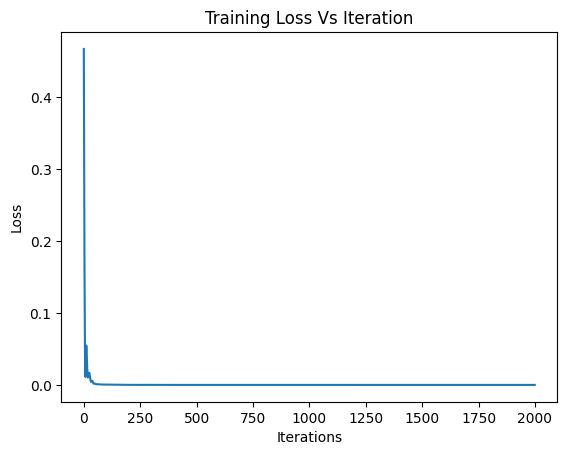


Name:Shivasri
Register Number:212224220098

Evaluation Results:
Mean Squared Error: 0.0025568713034073293
R2 Score: 0.9878239210710917

New Sample Input: [35, 45]
Predicted Output: 79.99847


In [ ]:

import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score

# STEP 1: Load Dataset
dataset = pd.read_csv("dataset.csv")   # Upload your CSV file in Colab

print("Dataset Preview:")
print(dataset.head())

# Separate features and target
X = dataset.iloc[:, 0:2].values
y = dataset.iloc[:, 2].values.reshape(-1,1)

# STEP 2: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# STEP 3: Scaling
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_train = scaler_X.fit_transform(X_train)
X_test = scaler_X.transform(X_test)

y_train = scaler_y.fit_transform(y_train)
y_test = scaler_y.transform(y_test)

# Convert to tensors
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.FloatTensor(y_train)
y_test = torch.FloatTensor(y_test)

# STEP 4: Build Neural Network
class NeuralNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(2,16)
        self.fc2 = nn.Linear(16,8)
        self.fc3 = nn.Linear(8,1)
        self.relu = nn.ReLU()

    def forward(self,x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Initialize model
model = NeuralNet()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# STEP 5: Training Function
def train_model(ai_brain, X_train, y_train, criterion, optimizer, epochs=2000):
    losses = []

    for epoch in range(epochs):
        optimizer.zero_grad()
        output = ai_brain(X_train)
        loss = criterion(output, y_train)
        loss.backward()
        optimizer.step()

        losses.append(loss.item())

        if epoch % 200 == 0:
            print(f"Epoch {epoch}, Loss: {loss.item()}")

    return losses

losses = train_model(model, X_train, y_train, criterion, optimizer)

# STEP 6: Plot Performance
plt.plot(losses)
plt.title("Training Loss Vs Iteration")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.show()

# STEP 7: Evaluation
model.eval()
with torch.no_grad():
    predictions = model(X_test)

mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print("\nName:Shivasri")
print("Register Number:212224220098")
print("\nEvaluation Results:")
print("Mean Squared Error:", mse)
print("R2 Score:", r2)

# New Sample Prediction
new_sample = np.array([[35,45]])
new_sample_scaled = scaler_X.transform(new_sample)
new_sample_tensor = torch.FloatTensor(new_sample_scaled)

with torch.no_grad():
    pred = model(new_sample_tensor)

pred_actual = scaler_y.inverse_transform(pred.numpy())

print("\nNew Sample Input: [35, 45]")
print("Predicted Output:", pred_actual[0][0])
